# 1. General Analysis

## Libraries And Utilities

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

In [2]:
s_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
s_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


<AxesSubplot:>

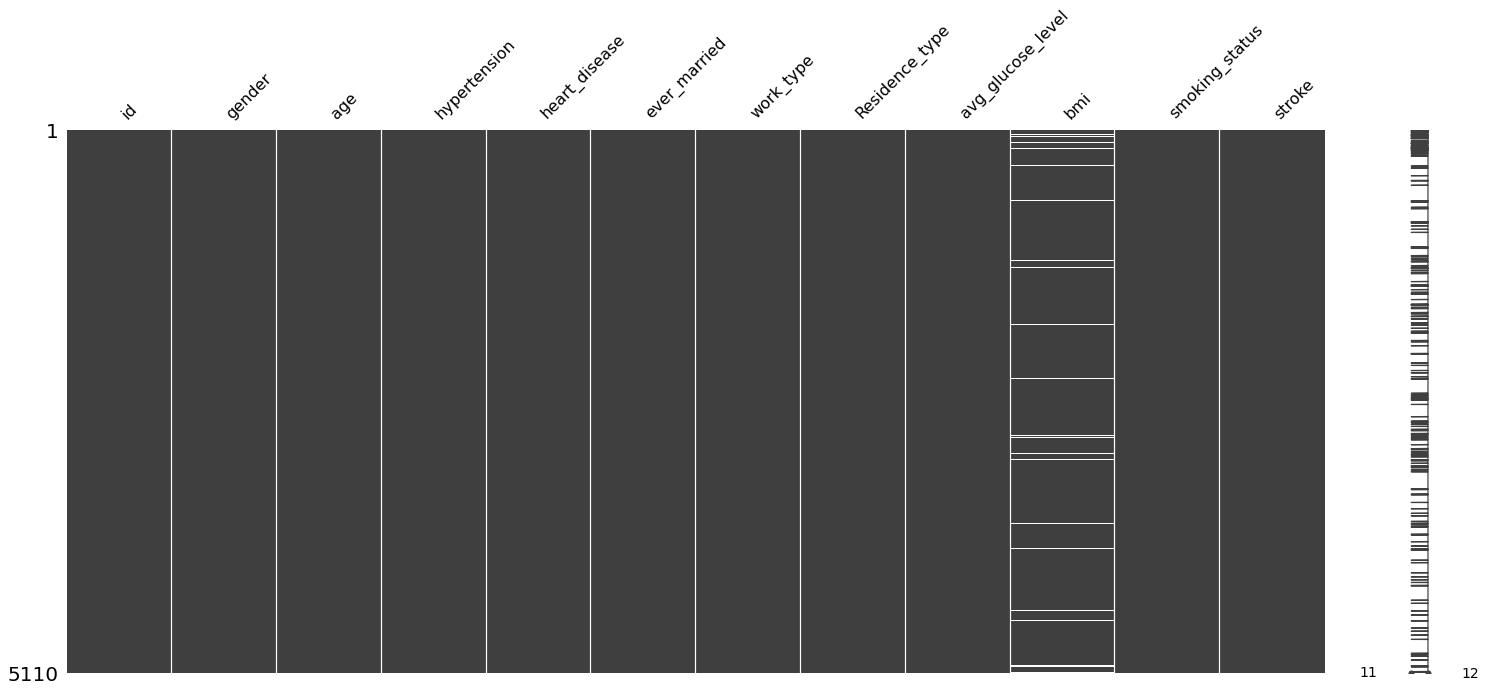

In [5]:
!pip install missingno
import missingno as msno

msno.matrix(s_data)


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Preprocessing

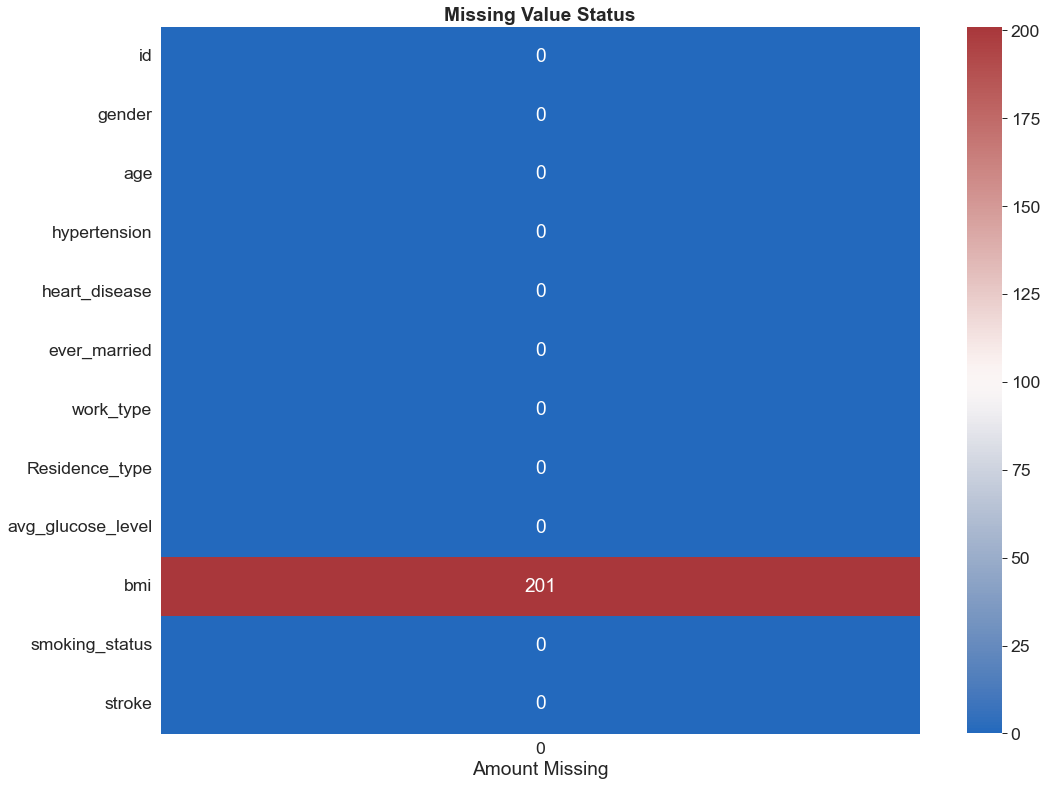

In [3]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(s_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
s_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
s_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
s_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns:")
for column in s_data.columns:
    if is_numeric_dtype(s_data[column]):
        print(column)
print("----------------------------------")        
print("Category columns:")        
for column in s_data.columns:
    if is_string_dtype(s_data[column]):
        print(column)

Numeric columns:
id
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
----------------------------------
Category columns:
gender
ever_married
work_type
Residence_type
smoking_status


In [18]:
# import knn imputer for filling missing values
df_na = s_data.copy()
from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=3)

col = ['bmi']
df_na[col] = transformer.fit_transform(df_na[col].round(decimals=0))

In [13]:
df_na.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df_na.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
df_na['bmi']=round(df_na['bmi'],0)

In [21]:
df_na['bmi'].unique()

array([37., 29., 32., 34., 24., 27., 23., 30., 28., 31., 38., 26., 22.,
       49., 44., 25., 20., 39., 36., 33., 40., 48., 46., 41., 35., 19.,
       42., 57., 45., 17., 21., 18., 50., 55., 61., 16., 43., 65., 47.,
       14., 15., 60., 51., 52., 72., 12., 56., 58., 54., 78., 53., 67.,
       10., 13., 98., 63., 11., 62., 64., 92.])

In [22]:
s_data = df_na.copy()

In [4]:
# DT_bmi_pipe = Pipeline( steps=[ 
#                                ('scale',StandardScaler()),
#                                ('lr',DecisionTreeRegressor(random_state=42))
#                               ])
# X = s_data[['age','gender','bmi']].copy()
# X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

# Missing = X[X.bmi.isna()]
# X = X[~X.bmi.isna()]
# Y = X.pop('bmi')
# DT_bmi_pipe.fit(X,Y)
# predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
# s_data.loc[Missing.index,'bmi'] = predicted_bmi

The missing 201 samples of BMI value were filled in KNN imputer, which gave the fair prediction for the missing values.

## Exploratory Data Analysis

### Analysis of Entire Sample Space

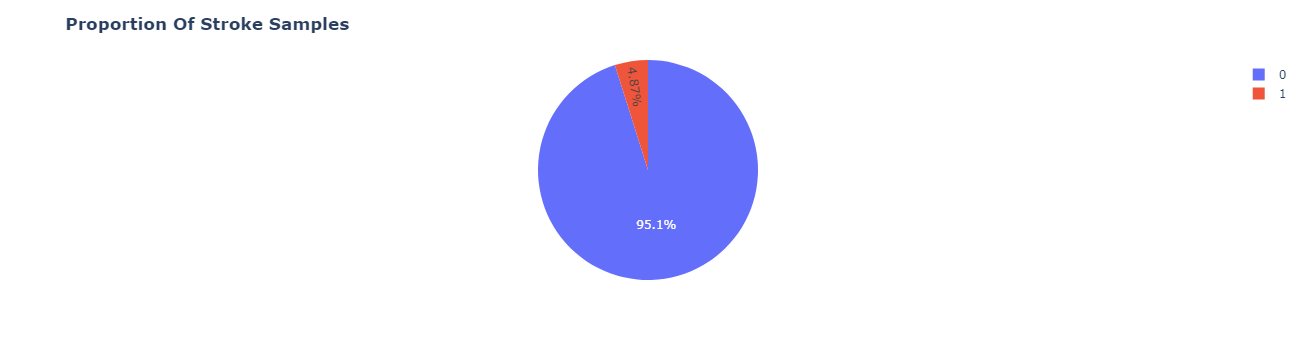

In [23]:
fig = ex.pie(s_data,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show()

The dataset is clearly imbalances. Let's have a better overview of some of the features relations.

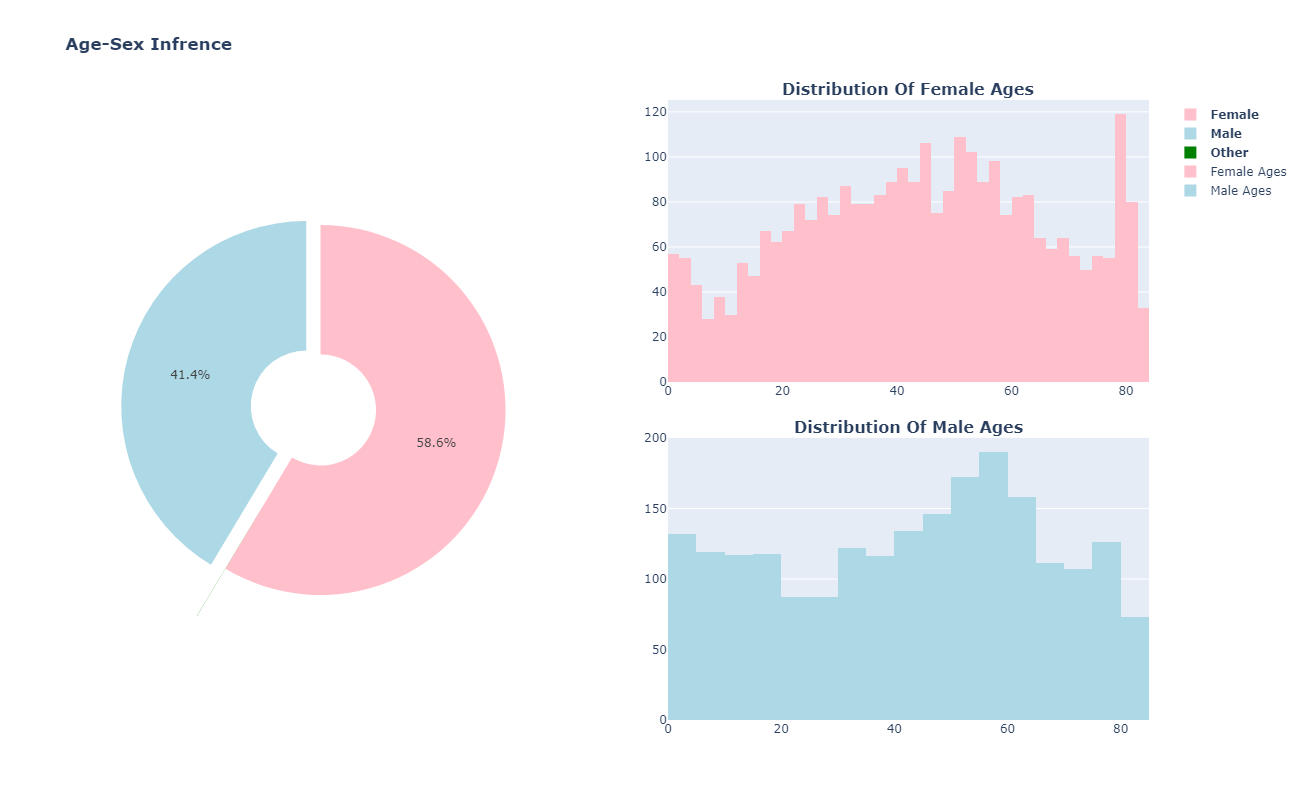

In [24]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=s_data.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=s_data.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=s_data.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence<b>",
)

fig.show()

There are slightly more females in the dataset and from a visual perspective, the ages seem to be normally distributed, but with a high variance measure due to the visible fat tail.

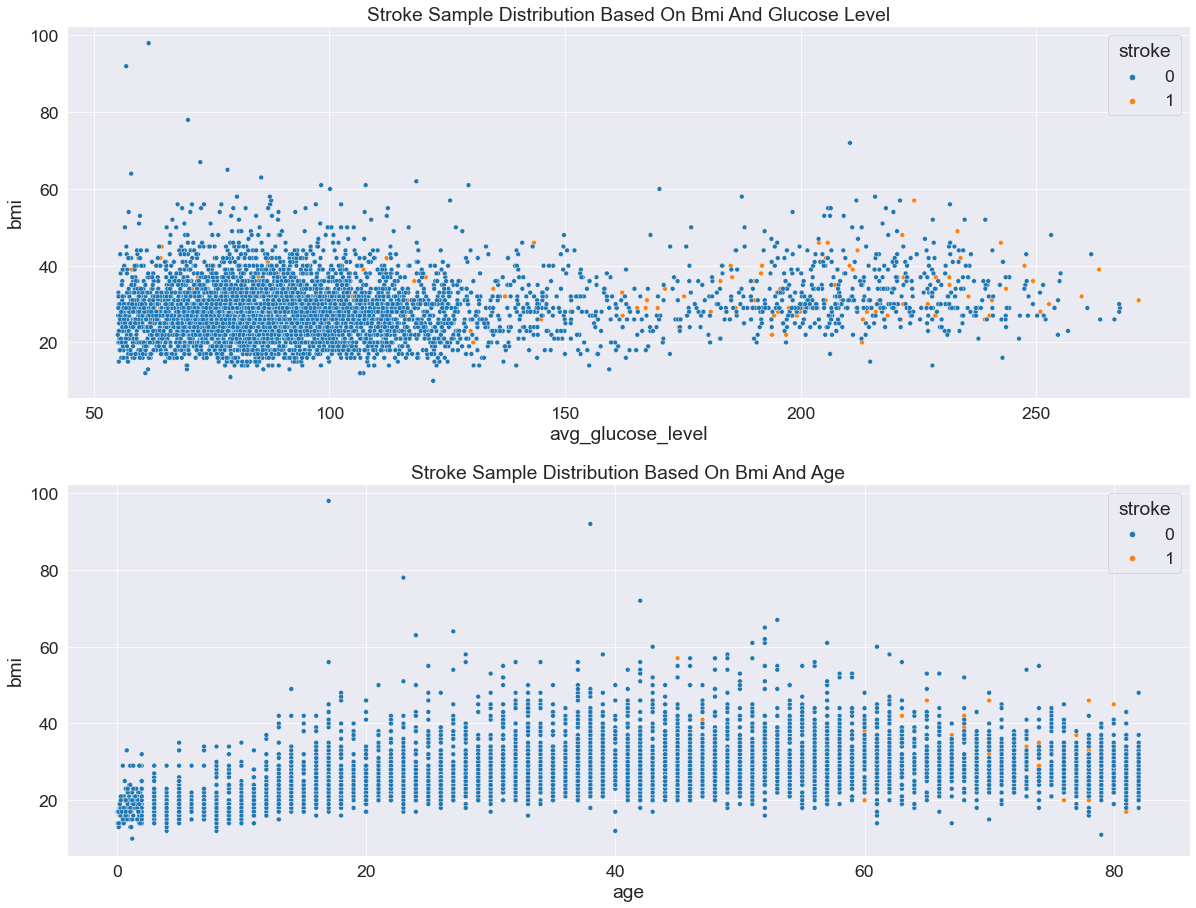

In [25]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=s_data['avg_glucose_level'],y=s_data['bmi'],hue=s_data['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=s_data['age'],y=s_data['bmi'],hue=s_data['stroke'])
plt.tight_layout()
plt.show()

Looks like there are two underlying populations based on the first scatter plot, where the x-axis is the clucose level. In both scatterplots, the individuals who had a stroke are located in the BMI value region under age 60 and in high clucose levels as well as old age.

### Analysis of Stroke Positive Population

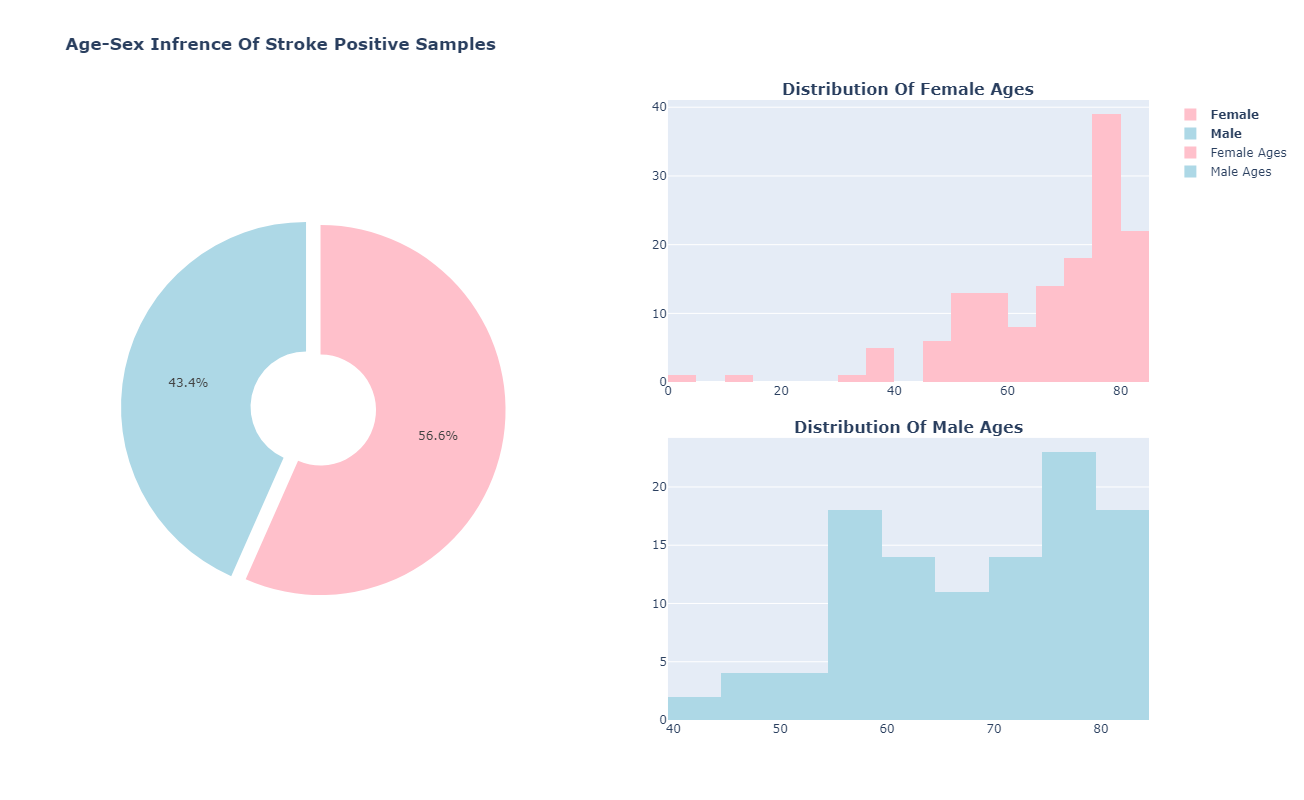

In [26]:
stroke_population = s_data.query('stroke ==1').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=stroke_population.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=stroke_population.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=stroke_population.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence Of Stroke Positive Samples<b>",
)

fig.show()

Seeing the different attributes, there are couple of interesting points to be noted:females (although appearing more than males in our dataset) also surpass the males in the stroke sample space, males are more prone to strokes in their early 50/60 where the median of the women stroke age is around 75-79.

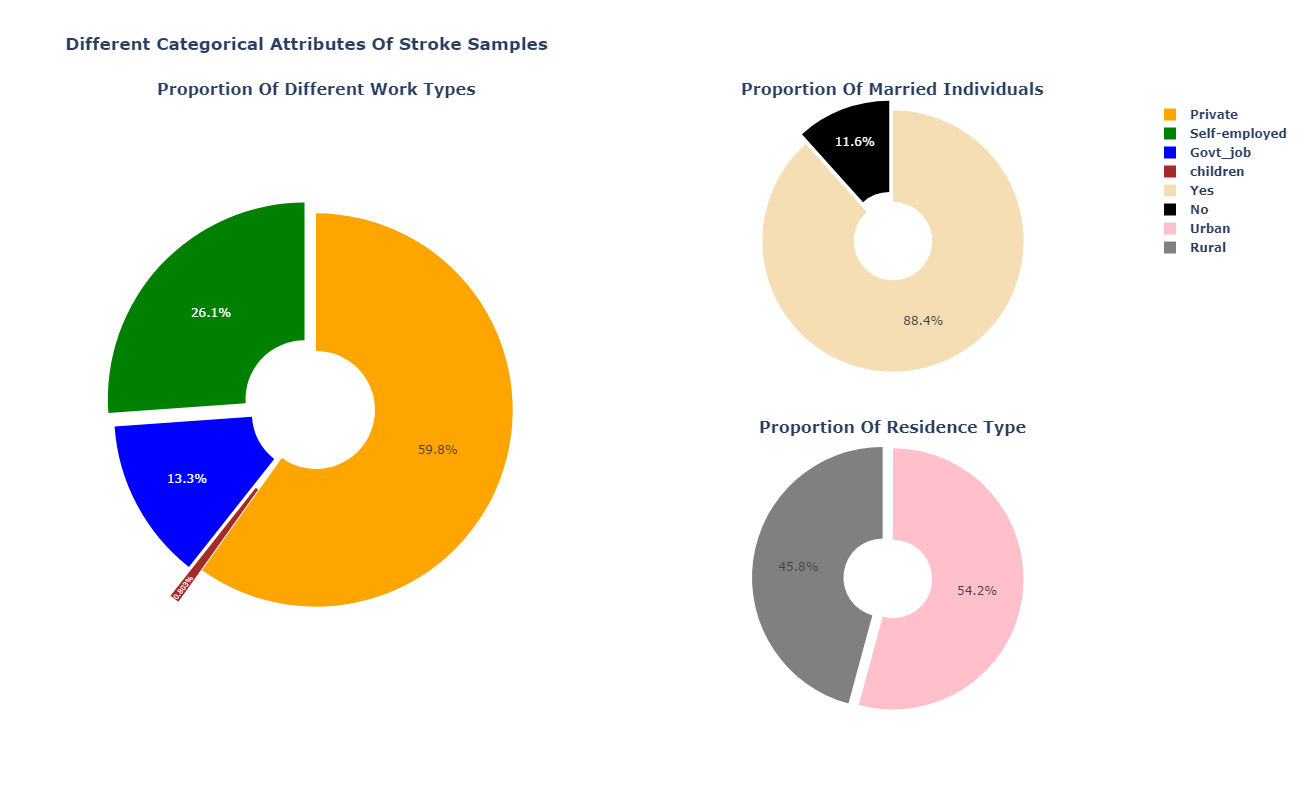

In [27]:
stroke_population = s_data.query('stroke ==1').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('<b>Proportion Of Different Work Types<b>','<b>Proportion Of Married Individuals<b>','<b>Proportion Of Residence Type<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=stroke_population.work_type.value_counts().values,labels=['<b>Private<b>','<b>Self-employed<b>','<b>Govt_job<b>','<b>children<b>','<b>Never_worked<b>'],hole=0.3,pull=[0,0.08,0.03,0.2],marker_colors=['orange','green','blue','brown','purple'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=stroke_population.ever_married.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],hole=0.3,pull=[0,0.08],marker_colors=['wheat','black'],textposition='inside'),
    row=1, col=2
)
fig.add_trace(
    go.Pie(values=stroke_population.Residence_type.value_counts().values,labels=['<b>Urban<b>','<b>Rural<b>'],hole=0.3,pull=[0,0.08],marker_colors=['pink','gray'],textposition='inside'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Different Categorical Attributes Of Stroke Samples<b>",
)

fig.show()

Seems that the marriage status and the residence type are distributed in a way that doesn't tell much confounding about stroke-positive individuals, the residence type is close to a uniform distribution and the marriage status is almost completely dominated by one of the values.

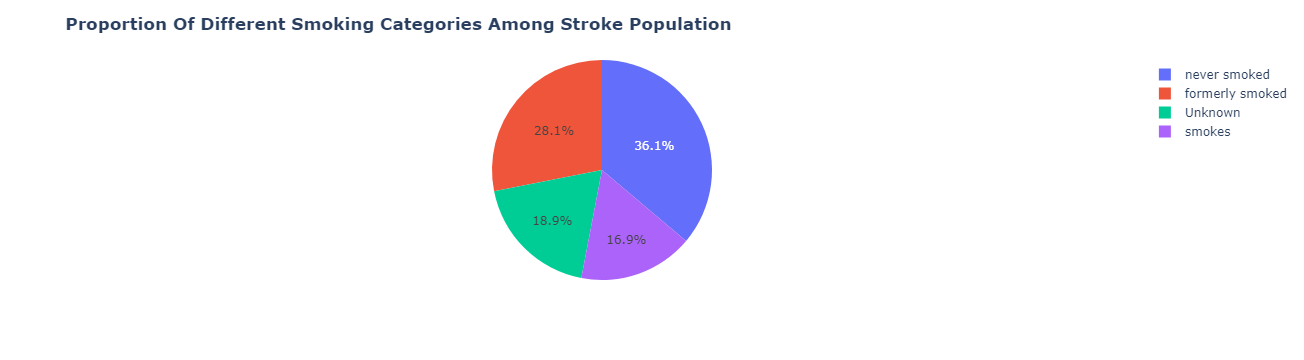

In [28]:
fig = ex.pie(stroke_population,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Different Smoking Categories Among Stroke Population<b>')
fig.show()

In [33]:
y = pd.DataFrame(s_data.iloc[0,:])
X = s_data.drop(['stroke'], axis=1)

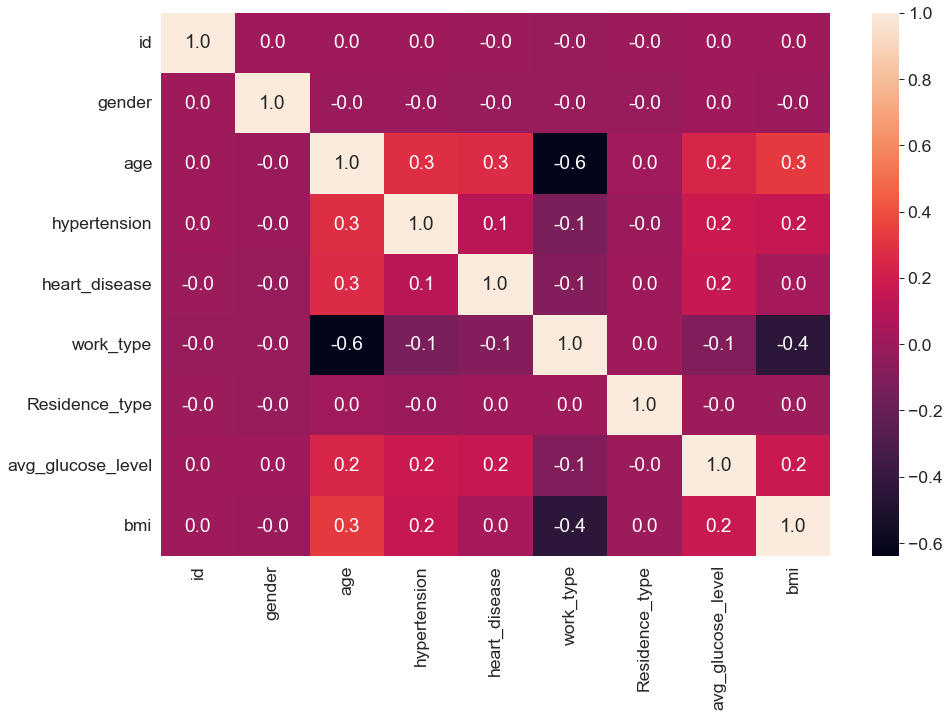

In [37]:
result = pd.concat([X, y], axis=1)
correlation_train = result.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

As for the dataset correlation, it seems that there is no clear numeric correlation between the stroke attribute and other numeric attributes in the dataset.

### Upsampling the Dataset

In [40]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [41]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
eval_df = s_data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(s_data.shape[0]*0.2),random_state=42)
train_df = s_data.drop(index=eval_df.index)

X_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X, y = oversample.fit_resample(X,y)
usampled_df = X.assign(Stroke = y)

X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
usampled_eval_df = X_eval.assign(Stroke = y_eval)

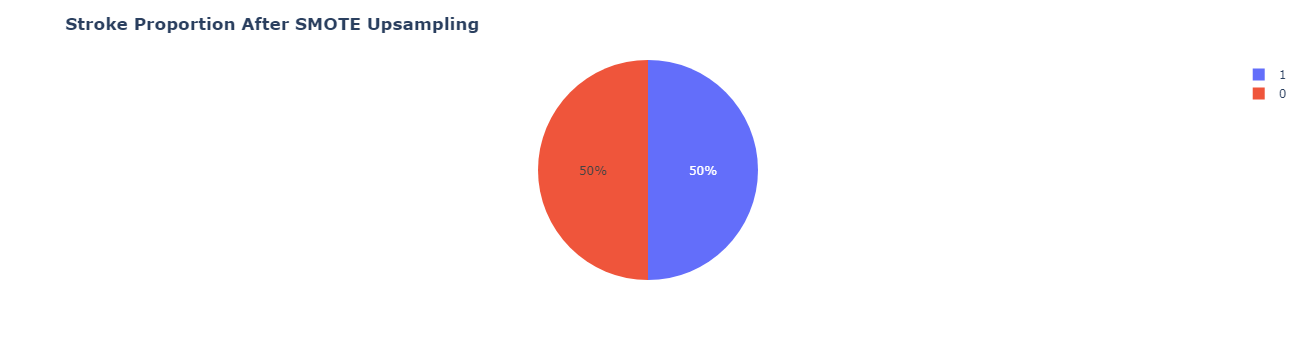

In [42]:
fig = ex.pie(usampled_df,names='Stroke')
fig.update_layout(title='<b>Stroke Proportion After SMOTE Upsampling<b>')
fig.show()

Now the dataset is uniformly balanced.

## Model Selection

In [44]:
DT_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
RF_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestClassifier(random_state=42))])
SVM_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',SVC(random_state=42))])
LR_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',LogisticRegression(random_state=42))])

X = usampled_df.iloc[:,:-1]
Y = usampled_df.iloc[:,-1]

X_EVAL = usampled_eval_df.iloc[:,:-1]
Y_EVAL = usampled_eval_df.iloc[:,-1]

holdout_x = X.sample(100)
holdout_y = Y.loc[X.index]

X = X.drop(index=holdout_x.index)
Y = Y.drop(index=holdout_x.index)

## Model Evaluation

In [45]:
DT_CROSS_VAL = cross_val_score(DT_PIPE,X,Y,cv=10,scoring='f1')
RF_CROSS_VAL = cross_val_score(RF_PIPE,X,Y,cv=10,scoring='f1')
SVM_CROSS_VAL = cross_val_score(SVM_PIPE,X,Y,cv=10,scoring='f1')
LR_CROSS_VAL = cross_val_score(LR_PIPE,X,Y,cv=10,scoring='f1')

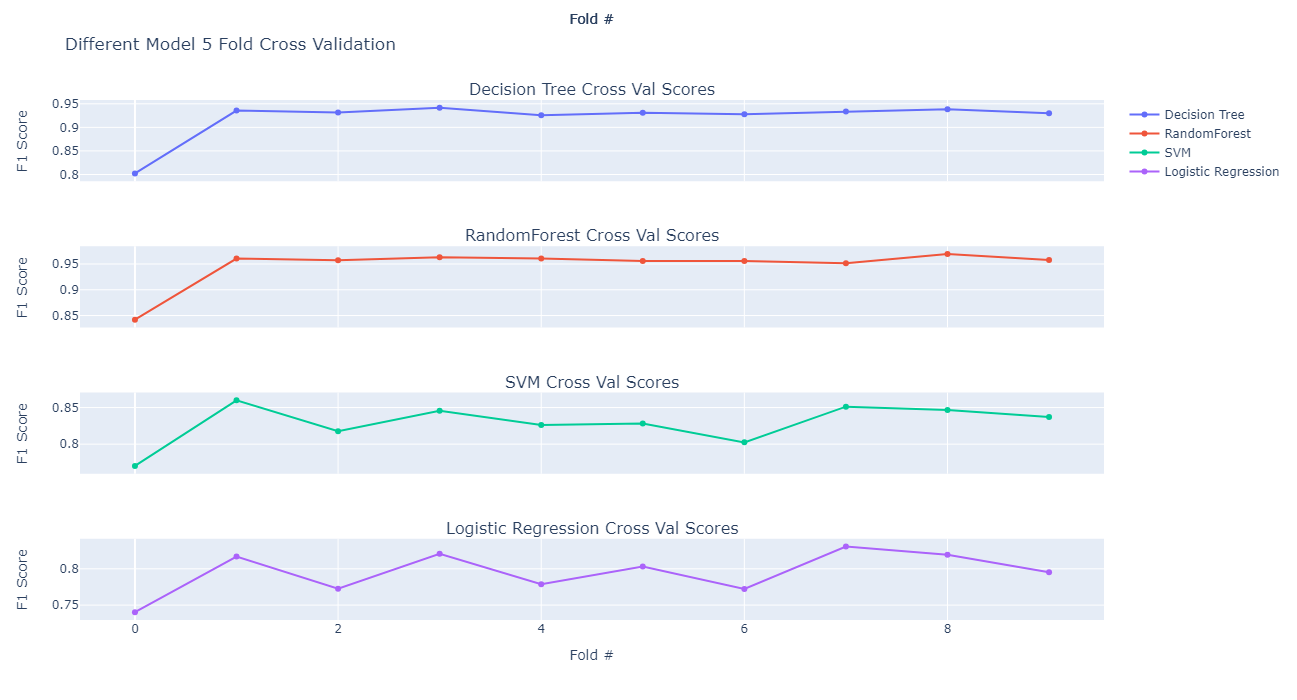

In [46]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Decision Tree Cross Val Scores',
                                                                     'RandomForest Cross Val Scores',
                                                                    'SVM Cross Val Scores','Logistic Regression Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=DT_CROSS_VAL,name='Decision Tree'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=RF_CROSS_VAL,name='RandomForest'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=SVM_CROSS_VAL,name='SVM'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=LR_CROSS_VAL,name='Logistic Regression'),
    row=4, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

Seems that from the cross-validation test, the random forest and decison tree models did the best on the average of overfitting the sample data, to test that those models indeed learned to predict stroke-prone individuals. Once again, will test these models on the original data before the upsampling was performed.

### Model Evaluation on Original Data (Before Upsampling)

In [47]:
DT_PIPE.fit(X,Y)
RF_PIPE.fit(X,Y)
SVM_PIPE.fit(X,Y)
LR_PIPE.fit(X,Y)

X = s_data.loc[:,X.columns]
Y = s_data.loc[:,'stroke']

DT_PRED   = DT_PIPE.predict(X_EVAL)
RF_PRED   =RF_PIPE.predict(X_EVAL)
SVM_PRED  = SVM_PIPE.predict(X_EVAL)
LR_PRED   = LR_PIPE.predict(X_EVAL)

DT_CM  = confusion_matrix(Y_EVAL,DT_PRED )
RF_CM  = confusion_matrix(Y_EVAL,RF_PRED )
SVM_CM = confusion_matrix(Y_EVAL,SVM_PRED)
LR_CM  = confusion_matrix(Y_EVAL,LR_PRED )

DT_F1  = f1_score(Y_EVAL,DT_PRED )
RF_F1  = f1_score(Y_EVAL,RF_PRED )
SVM_F1 = f1_score(Y_EVAL,SVM_PRED)
LR_F1  = f1_score(Y_EVAL,LR_PRED )

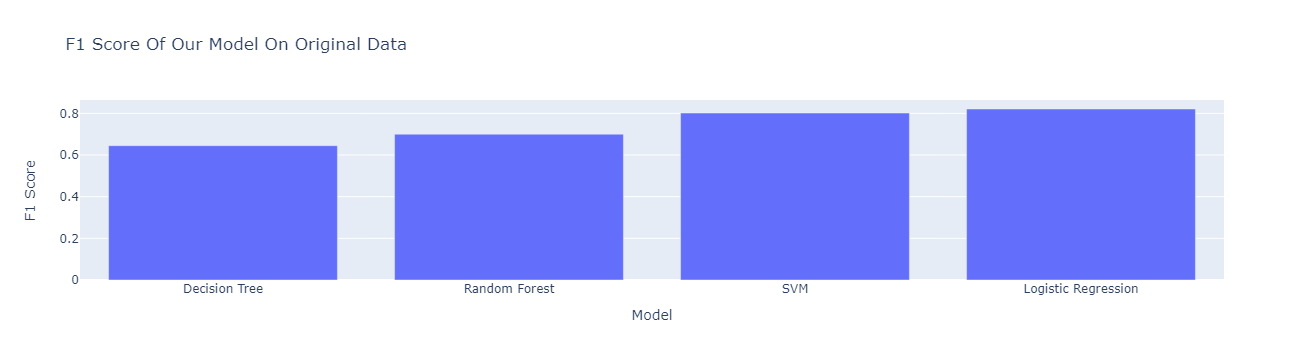

In [48]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','SVM','Logistic Regression'],y=[DT_F1,RF_F1,SVM_F1,LR_F1]))
fig.update_layout(title='F1 Score Of Our Model On Original Data',xaxis_title='Model',yaxis_title='F1 Score')
fig.show()

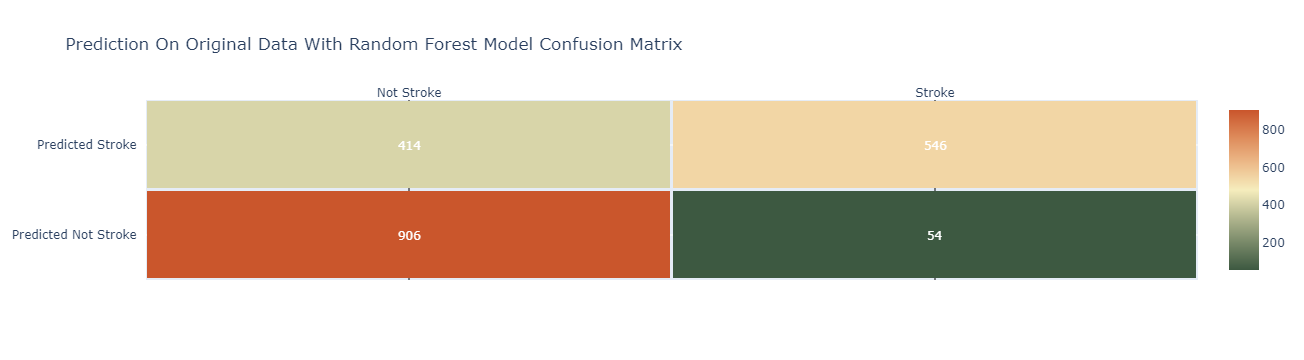

In [49]:
z=RF_CM
fig = ff.create_annotated_heatmap(z, x=['Not Stroke','Stroke'], y=['Predicted Not Stroke','Predicted Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With Random Forest Model Confusion Matrix')
fig.show()

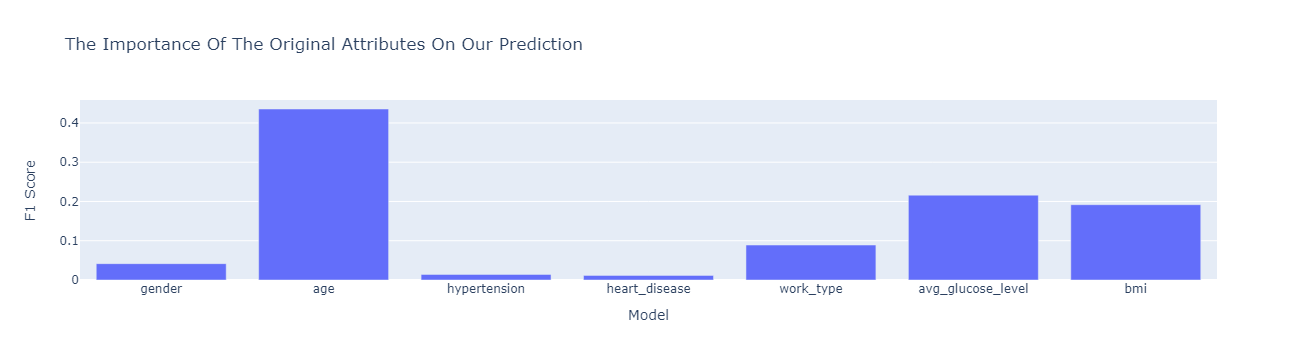

In [50]:
fig = go.Figure()
fig.add_trace(go.Bar(x=X.columns,y=RF_PIPE['DT'].feature_importances_))
fig.update_layout(title='The Importance Of The Original Attributes On Our Prediction',xaxis_title='Model',yaxis_title='F1 Score')
fig.show()

A very interesting inference to be made here is what attributes had the most important in predicting stroke-prone individuals and we see that the BMI, age and glucose level of the individuals are by far the most significant predictors for a stroke-prone individual.

# 2. Neural Network Model

In [51]:
df=s_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,37.0,1
1,61.0,0,0,202.21,29.0,1
2,80.0,0,1,105.92,32.0,1
3,49.0,0,0,171.23,34.0,1
4,79.0,1,0,174.12,24.0,1


In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(s_data['gender'])
df['ever_married']=le.fit_transform(s_data['ever_married'])
df['work_type']=le.fit_transform(s_data['work_type'])
df['Residence_type']=le.fit_transform(s_data['Residence_type'])
df['smoking_status']=le.fit_transform(s_data['smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,37.0,1,0,1,0,1,1
1,61.0,0,0,202.21,29.0,1,1,1,1,0,2
2,80.0,0,1,105.92,32.0,1,0,1,0,0,2
3,49.0,0,0,171.23,34.0,1,1,1,0,1,3
4,79.0,1,0,174.12,24.0,1,1,1,1,0,2


In [57]:
df.shape

(5110, 11)

In [60]:
y=df['stroke']
X=df.drop('stroke',axis=1)
X.shape,y.shape

((5110, 10), (5110,))

Text(0.5, 1.0, 'COUNT PLOT')

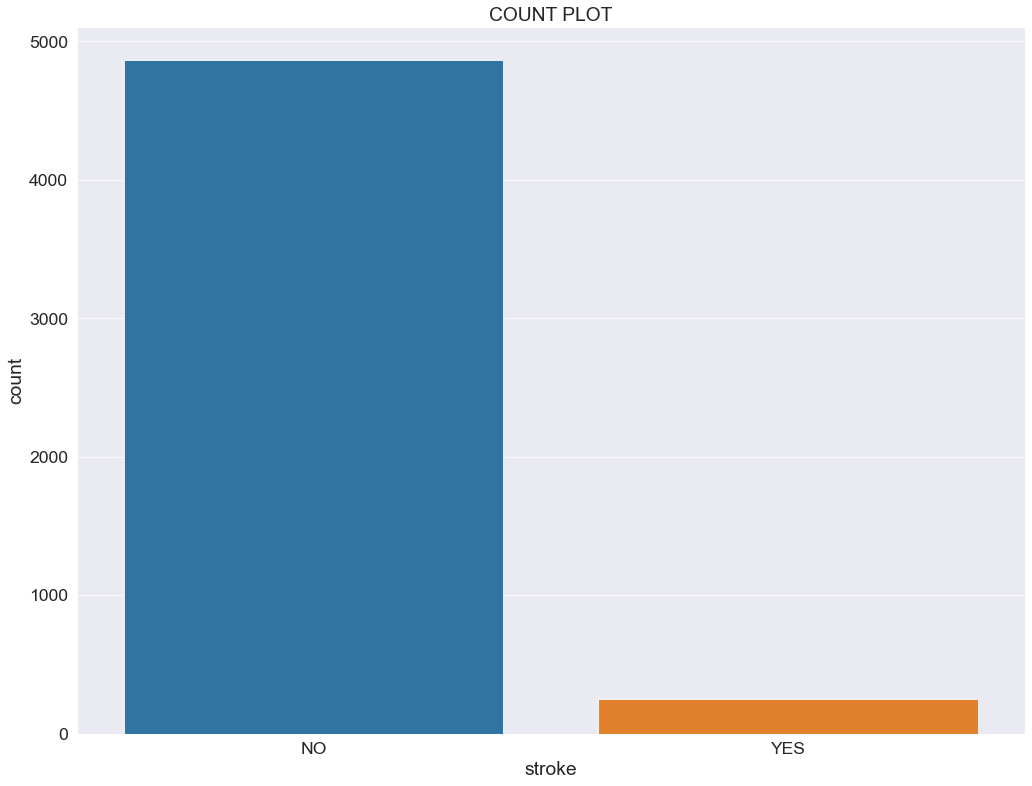

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y)
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

In [63]:
# Splitting the date into training and testing data
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.2)

In [67]:
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [68]:
# Creating Artificial Neural Network Model
import tensorflow as tf
ann=tf.keras.Sequential()

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [69]:
# Training the Model
result=ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
128/128 [==============================] - 1s 2ms/step - loss: 0.2582 - accuracy: 0.9452
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9469
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9489
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9489
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9489
Epoch 6/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9469
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9494
Epoch 8/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9462
Epoch 9/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9481
Epoch 10/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9472

In [70]:
# Creating Confusion Matrix for the actual and predicted value
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in ann.predict(x_test):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_test,y_pred)

32/32 [==============================] - 0s 2ms/step


array([[976,   0],
       [ 46,   0]], dtype=int64)

### Accuracy Score for Testing Data

In [71]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9549902152641878